<a href="https://colab.research.google.com/github/davidislip/SVM-and-MVO/blob/main/PCA_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCA Transformation of attributes

In [ ]:
!sudo python -m pip install gurobipy==9.1.2
import gurobipy as gp
from gurobipy import GRB
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)
from math import sqrt
import sys
pth = 'gdrive/My Drive/Colab Notebooks/'
sys.path.append(pth + 'SVM MVO/PYFILES/')
from packages import *
from r_pca import *
from sklearn.decomposition import PCA
%matplotlib inline

## Import Forecasts
forecasts = pd.read_pickle(pth +'SVM MVO/DATA/Forecasts.pkl')
## Import Returns
rets = pd.read_pickle(pth + 'SVM MVO/DATA/RETS.pkl')
## Import feature vectors
wrds_svm = pd.read_pickle(pth + 'SVM MVO/DATA/WRDS_ASOF.pkl')

Mounted at /content/gdrive


In [ ]:
#preprocessing 
tics = list(rets.columns)
print("valid tickers:", tics)
#get the wharton research data for the valid tickers for the month
#restrict the wharton research data to the columns of interest
Y = wrds_svm.loc[:,"ROC1":"GRW8"] # Y matrix in formulation 
Y_ =  (Y - Y.mean(axis=0))/(Y.std(axis=0))
Y_ = Y_.iloc[:,:]
Y_.columns
Y_.mean()

valid tickers: ['AAPL', 'ABC', 'ABMD', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AJG', 'AKAM', 'ALB', 'ALK', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ATO', 'AVY', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BKNG', 'BLL', 'BMY', 'BSX', 'BWA', 'CAG', 'CAH', 'CAT', 'CCI', 'CCL', 'CDNS', 'CERN', 'CHD', 'CHRW', 'CI', 'CL', 'CLX', 'CMCSA', 'CMI', 'CMS', 'CNP', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DD', 'DGX', 'DHR', 'DIS', 'DISH', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'F', 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FISV', 'FLS', 'FMC', 'GD', 'GIS', 'GLW', 'GPC', 'GPS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HFC', 'HOG', 'HOLX', 'HON', 'HP', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HSY', 'HUM', 'IBM', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IRM', 

ROC1    -5.321199e-15
ROC2     6.842883e-17
ROC3    -5.755075e-17
ROC4     1.545069e-14
ROC5     2.170526e-16
INV1    -4.327805e-16
INV2     2.101790e-15
INV3     3.253609e-15
PRO1     1.334464e-16
PRO2     2.184986e-16
PRO3     4.653018e-16
PRO4    -4.143919e-16
PRO5    -6.462627e-16
PRO6    -1.397130e-15
PRO7     2.261126e-17
LEV1     7.941057e-16
LEV2     8.732530e-16
LEV3     1.780045e-15
LEV4    -1.393581e-15
LEV5     1.013321e-14
RET1    -4.553434e-15
LIQ1    -3.891670e-15
LIQ2    -1.624189e-14
LIQ3     6.035192e-16
LIQ4    -2.970554e-14
LIQ5     3.569552e-15
RISK1    9.961169e-16
RISK2   -1.840836e-15
RISK3    2.236665e-14
GRW1    -1.517052e-15
GRW2    -6.751879e-16
GRW3     1.424555e-15
GRW4    -2.108416e-16
GRW5     3.878303e-16
GRW6    -2.132647e-15
GRW7     1.208013e-15
GRW8    -1.218881e-15
dtype: float64

iteration: 1, error: 0.48034786433801707
iteration: 100, error: 0.004194831648631516
iteration: 200, error: 0.0015375695873823686
iteration: 300, error: 0.004781883894759568
iteration: 400, error: 0.013494401239285915
iteration: 500, error: 0.0043765329217360085
iteration: 600, error: 0.0037138683093938217
iteration: 700, error: 0.003041589447158077
iteration: 800, error: 0.0024427778933180043
iteration: 900, error: 0.0022548462754483495
iteration: 1000, error: 0.0016602387621569513
iteration: 1100, error: 0.0015976461781430607
iteration: 1200, error: 0.0012272912774330062
iteration: 1300, error: 0.0008330203452507248
iteration: 1400, error: 0.0009125624336424927
iteration: 1500, error: 0.000742892751741952
iteration: 1600, error: 0.0007412928561792689
iteration: 1700, error: 0.0006735515330522698
iteration: 1800, error: 0.0006496111797833308
iteration: 1900, error: 0.0005664178485256618
iteration: 2000, error: 0.000470619772051403
iteration: 2100, error: 0.0003809029844420364
iteratio

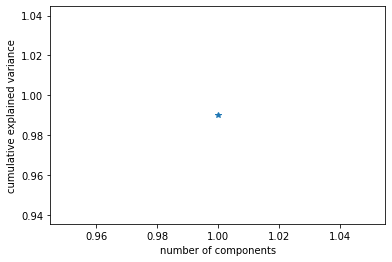

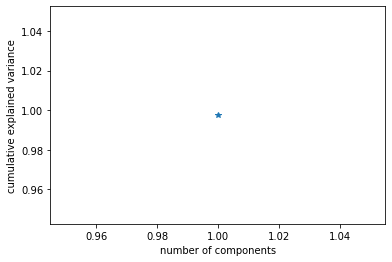

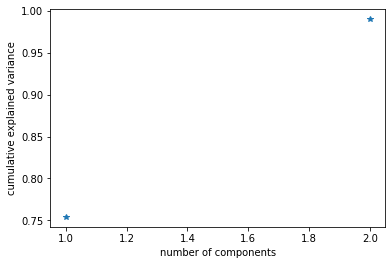

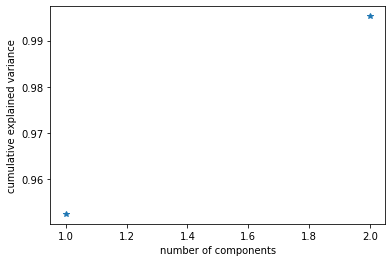

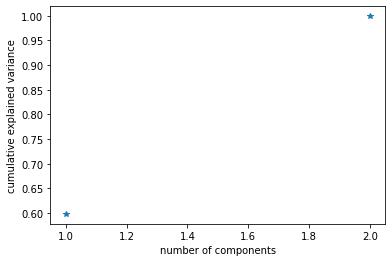

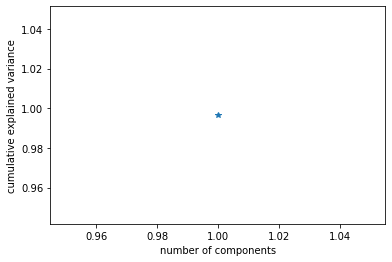

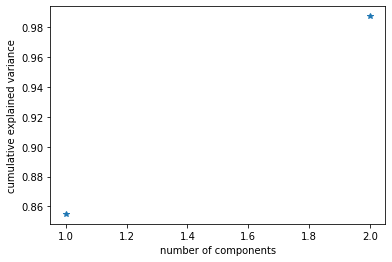

In [ ]:
# use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse

def PCA_Transform(Y_):
  '''
  robust pca to get T matrix, then transformed to pca factor values
  cumulative % of var explained is also plotted
  '''
  dup_index = Y_.groupby(Y_.columns.tolist(), sort=False).ngroup()
  dup_index.name = 'dup_index'
  rpca = R_pca(Y_.drop_duplicates().values)
  
  L, S = rpca.fit(max_iter=10000, iter_print=100)
  pca = PCA(0.98)
  pca.fit(L)
  plt.figure()
  plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,\
           np.cumsum(pca.explained_variance_ratio_), "*")
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance');

  transformed_Y = pd.merge(dup_index, pd.DataFrame(pca.transform(L)), how = 'left', right_index = True, left_on = 'dup_index' )

  return transformed_Y.drop(columns = ['dup_index'])
ROC = PCA_Transform(Y_.loc[:,'ROC1':'ROC5'])
INV = PCA_Transform(Y_.loc[:,'INV1':'INV3'])
PRO = PCA_Transform(Y_.loc[:,'PRO1':'PRO7'])
LEV = PCA_Transform(Y_.loc[:,'LEV1':'LEV5'])
RET = Y_.RET1.values
LIQ = PCA_Transform(Y_.loc[:,'LIQ1':'LIQ5'])
RISK = PCA_Transform(Y_.loc[:,'RISK1':'RISK3'])
GRW = PCA_Transform(Y_.loc[:,'GRW1':'GRW8'])


In [ ]:

ROC_pd = pd.DataFrame(ROC.values, index = Y_.index, \
             columns = ['ROC'+str(i) for i in range(ROC.shape[1])])
INV_pd = pd.DataFrame(INV.values , index = Y_.index, \
             columns = ['INV'+str(i) for i in range(INV.shape[1])])
PRO_pd = pd.DataFrame(PRO.values , index = Y_.index, \
             columns = ['PRO'+str(i) for i in range(PRO.shape[1])])
LEV_pd = pd.DataFrame(LEV.values , index = Y_.index, \
             columns = ['LEV'+str(i) for i in range(LEV.shape[1])])
RET_pd = pd.DataFrame(RET, index = Y_.index, \
             columns = ['RET'+str(i) for i in range(1)])
LIQ_pd = pd.DataFrame(LIQ.values , index = Y_.index, \
             columns = ['LIQ'+str(i) for i in range(LIQ.shape[1])])
RISK_pd = pd.DataFrame(RISK.values , index = Y_.index, \
             columns = ['RISK'+str(i) for i in range(RISK.shape[1])])
GRW_pd = pd.DataFrame(GRW.values , index = Y_.index, \
             columns = ['GRW'+str(i) for i in range(GRW.shape[1])])

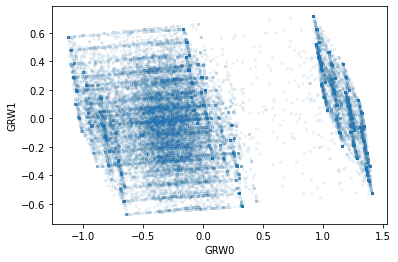

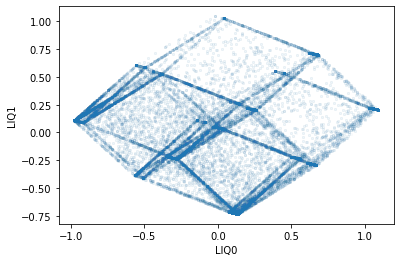

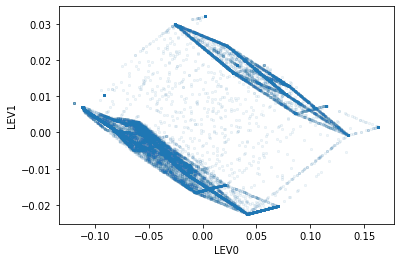

In [ ]:
GRW_pd.plot.scatter(x = 'GRW0', y = 'GRW1', marker = '.', alpha = 0.02)
LIQ_pd.plot.scatter(x = 'LIQ0', y = 'LIQ1', marker = '.', alpha = 0.02)
LEV_pd.plot.scatter(x = 'LEV0', y = 'LEV1', marker = '.', alpha = 0.02)

In [ ]:
Y_pca = pd.concat([ROC_pd, INV_pd, PRO_pd, LEV_pd, RET_pd, LIQ_pd, RISK_pd, GRW_pd], axis=1)
Y_pca.to_pickle(pth + 'SVM MVO/DATA/WRDS_PCA.pkl')

In [ ]:
Y_pca

ROC0      INV0      PRO0  ...     RISK0      GRW0      GRW1
MonthStart tic                                 ...                              
2000-07-01 AAPL  0.164079 -0.131661 -0.002041  ...  0.026931  0.051272 -0.268893
           ABC  -0.184661  0.039112 -0.131945  ...  0.585148 -0.008460  0.122760
           ABMD -0.188921 -0.131661 -0.151344  ...  0.667843  0.103879  0.016581
           ABT   0.193937 -0.005993 -0.004779  ... -0.035347 -0.814612 -0.355179
           ADBE  0.201986 -0.118067 -0.015779  ... -0.628262 -0.919653 -0.227452
...                   ...       ...       ...  ...       ...       ...       ...
2020-10-01 XOM  -0.040580  0.171717  0.053401  ... -0.404747 -0.274007  0.259539
           XRAY -0.166112  0.052706 -0.001121  ...  0.390833 -0.580583  0.468589
           XRX  -0.175789  0.171717  0.053953  ...  0.273013 -0.344995  0.415955
           YUM   0.072795  0.000944  0.009423  ...  0.444329 -0.433855  0.053686
           ZBRA  0.165152 -0.130772 -0.007946  ...  0.051201 -0.327232  0.396358

[69784 rows x 12 columns]